## Dimensionality Reduction & Unsupervised Learning

To perform dimensionality reduction and unsupervised learning, we can use various techniques such as Principal Component Analysis (PCA), t-SNE, and clustering algorithms like K-means or DBSCAN. These techniques help in reducing the dimensionality of the data and finding patterns or groups within the data without the need for labeled data.

## Authors
* **Alireza Arbabi**
* **Hadi Babalou**
* **Ali Padyav**
* **Kasra Hajiheidari**

## Table of Contents

## Setting Up the Environment

In [2]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import LabelEncoder
import csv
from io import StringIO
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
user32
tzres.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\sklearn\.libs\vcomp140.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\sklearn\.libs\msvcp140.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libansari.R6EA3HQP5KZ6TAXU4Y4ZVTRPT7UVA53Z.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libbanded5x.7J4WS2QZKMXGIZDNNWWXUXE52PU2TOEI.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libbispeu.7AH3PCQ2E2NGLC3AQD7FFAH73KGJTZCJ.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libblkdta00.MVYK4IMPWHTMFZE66OC6K7KR6X3K76U2.gfortran-win_amd64.dll
C:\Users\Emertat\AppData\Roaming\Python\Python38\site-packages\scipy\.libs\libchkder.G7WSOGI

## Data Preparation

### Dataset Description

In 2014, some researchers published an article called "Impact of c1HbA Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records." They gathered data on diabetic patients from many hospitals and clinics in America. Some of this data, about 200,000 items with 50 features, has been shared with the public in a way that keeps people's identities private.

Features

- Encounter ID:	Unique identifier of an encounter
- Patient number: Unique identifier of a patient
- Race: Caucasian, Asian, African American, Hispanic, and other	2%
- Gender: male, female, and unknown/invalid	0%
- Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)	0%
- Weight: Weight in pounds.	97%
- Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, - newborn, and not available	0%
- Discharge disposition:	Integer identifier corresponding to 29 distinct values, for example, discharged to home, - expired, and not available	0%
- Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital	0%
- Time in hospital: Integer number of days between admission and discharge	0%
- Payer code: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, - and self-pay	52%
- Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon	53%
- Number of lab procedures: Number of lab tests performed during the encounter	0%
- Number of procedures: Number of procedures (other than lab tests) performed during the encounter	0%
- Number of medications: Number of distinct generic names administered during the encounter	0%
- Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter	0%
- Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter	0%
- Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter	0%
- Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values	0%
- Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values	0%
- Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values	1%
- Number of diagnoses: Number of diagnoses entered to the system	0%
- Glucose serum test result: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured	0%
- A1c test result: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.	0%
- Change of medications: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”	0%
- Diabetes medications: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”	0%
- 24 features for medications: For the generic names: `metformin`, `repaglinide`, `nateglinide`, `chlorpropamide`, `glimepiride`, `acetohexamide`, `glipizide`, `glyburide`, `tolbutamide`, `pioglitazone`, `rosiglitazone`, `acarbose`, `miglitol`, `troglitazone`, `tolazamide`, `examide`, `sitagliptin`, `insulin`, `glyburide-metformin`, `glipizide-metformin`, `glimepiride-pioglitazone`, `metformin-rosiglitazone`, `and metformin-pioglitazone`, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed	0%
- Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.

### Loading the Dataset

In [4]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Store mapping of feature names to their descriptions in a dictionary.

In [7]:
def csv_to_dict(csv_string, header):
    if header:
        csv_string = csv_string.split("\n", 1)[1]

    csv_file = StringIO(csv_string)
    dictionary = {}
    reader = csv.reader(csv_file, delimiter=',', quotechar='"')

    for row in reader:
        key, value = row
        dictionary[key] = value

    return dictionary

In [8]:
with open('IDs_mapping.csv', 'r') as file:
    csv_data = file.read()

admission_type, discharge_disposition, admission_source = csv_data.split('\n,\n')

admission_type_mapping = csv_to_dict(admission_type, header=True)
discharge_disposition_mapping = csv_to_dict(discharge_disposition, header=True)
admission_source_mapping = csv_to_dict(admission_source, header=True)

print(admission_type_mapping)
print(discharge_disposition_mapping)
print(admission_source_mapping)


{'1': 'Emergency', '2': 'Urgent', '3': 'Elective', '4': 'Newborn', '5': 'Not Available', '6': 'NULL', '7': 'Trauma Center', '8': 'Not Mapped'}
{'1': 'Discharged to home', '2': 'Discharged/transferred to another short term hospital', '3': 'Discharged/transferred to SNF', '4': 'Discharged/transferred to ICF', '5': 'Discharged/transferred to another type of inpatient care institution', '6': 'Discharged/transferred to home with home health service', '7': 'Left AMA', '8': 'Discharged/transferred to home under care of Home IV provider', '9': 'Admitted as an inpatient to this hospital', '10': 'Neonate discharged to another hospital for neonatal aftercare', '11': 'Expired', '12': 'Still patient or expected to return for outpatient services', '13': 'Hospice / home', '14': 'Hospice / medical facility', '15': 'Discharged/transferred within this institution to Medicare approved swing bed', '16': 'Discharged/transferred/referred another institution for outpatient services', '17': 'Discharged/transf

### Preprocessing

In [9]:
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

As we saw in the previous section, there is "?" in the dataset. We need to replace them with NaN values.

In [10]:
df = df.replace('?', np.nan)
df = df.replace('None', np.nan)

#### Missing Values

A function to calculate the percentage of missing values in each column.

In [11]:
def null_percentage(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing_percentage = missing / df.shape[0] * 100
    missing_info = pd.DataFrame({'missing': missing, 'missing_percentage': missing_percentage})
    missing_info = missing_info.sort_values(by='missing', ascending=False)
    print(missing_info)
    return missing_info

In [12]:
missing_info = null_percentage(df)
missing_info

                   missing  missing_percentage
weight               98569           96.858479
max_glu_serum        96420           94.746772
A1Cresult            84748           83.277322
medical_specialty    49949           49.082208
payer_code           40256           39.557416
race                  2273            2.233555
diag_3                1423            1.398306
diag_2                 358            0.351787
diag_1                  21            0.020636


,missing,missing_percentage
weight,98569,96.858479
max_glu_serum,96420,94.746772
A1Cresult,84748,83.277322
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


In [13]:
missing_cols = missing_info[missing_info['missing_percentage'] > 30].index
print(missing_cols)
df = df.drop(missing_cols, axis=1)

Index(['weight', 'max_glu_serum', 'A1Cresult', 'medical_specialty',
       'payer_code'],
      dtype='object')


In [14]:
df = df.dropna()

In [15]:
missing_info = null_percentage(df)
missing_info

Empty DataFrame
Columns: [missing, missing_percentage]
Index: []


,missing,missing_percentage


#### Duplicates

There is no duplicate data in the dataset.

In [16]:
print(df['encounter_id'].duplicated().sum())

0


We don't need id columns, so we drop them.

In [17]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

#### Type Conversion

Non numerical columns are converted to numerical columns.

In [18]:
df.select_dtypes(exclude=np.number).columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [19]:
def encode_onehot(df, column):
    onehot = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, onehot], axis=1)
    df = df.drop(column, axis=1)
    return df

def encode_label(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    return mapping, df

##### Race

In [20]:
df['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1484
Asian                625
Name: race, dtype: int64

In [21]:
df = encode_onehot(df, 'race')

##### Gender

In [22]:
df['gender'].value_counts()

Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64

In [23]:
df = df[df['gender'] != 'Unknown/Invalid']

df = encode_onehot(df, 'gender')

##### Age

In [24]:
df['age'].value_counts()

[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64

In [25]:
age_mapping = {"[0-10)": 0, "[10-20)": 1, "[20-30)": 2,
               "[30-40)": 3, "[40-50)": 4, "[50-60)": 5,
               "[60-70)": 6, "[70-80)": 7, "[80-90)": 8,
               "[90-100)": 9}

df['age'] = df['age'].replace(age_mapping)

##### Diag

diag_1 is the primary diagnosis 848 distinct values, diag_2 is the secondary diagnosis 923 distinct values, and diag_3 is the additional secondary diagnosis 954 distinct values.

Each diag is coded as first three digits of ICD9.

ICD-9 codes are used to classify diseases and injuries. The first three digits of the ICD-9 code represent the category of the diagnosis.

- 001–139: infectious and parasitic diseases
- 140–239: neoplasms
- 240–279: endocrine, nutritional and metabolic diseases, and immunity disorders
- 280–289: diseases of the blood and blood-forming organs
- 290–319: mental disorders
- 320–389: diseases of the nervous system and sense organs
- 390–459: diseases of the circulatory system
- 460–519: diseases of the respiratory system
- 520–579: diseases of the digestive system
- 580–629: diseases of the genitourinary system
- 630–679: complications of pregnancy, childbirth, and the puerperium
- 680–709: diseases of the skin and subcutaneous tissue
- 710–739: diseases of the musculoskeletal system and connective tissue
- 740–759: congenital anomalies
- 760–779: certain conditions originating in the perinatal period
- 780–799: symptoms, signs, and ill-defined conditions
- 800–999: injury and poisoning
- E and V codes: external causes of injury and supplemental classification

In [26]:
ranges = [
    (1, 139, 1),
    (140, 239, 2),
    (240, 279, 3),
    (280, 289, 4),
    (290, 319, 5),
    (320, 389, 6),
    (390, 459, 7),
    (460, 519, 8),
    (520, 579, 9),
    (580, 629, 10),
    (630, 679, 11),
    (680, 709, 12),
    (710, 739, 13),
    (740, 759, 14),
    (760, 779, 15),
    (780, 799, 16),
    (800, 999, 17)
]

def map_diag_code(code):
    try:
        num_code = int(code)
        for start, end, label in ranges:
            if start <= num_code <= end:
                return label
    except ValueError:
        if code.startswith('E') or code.startswith('V'):
            return 18
    return 0

In [27]:
df['diag_1'] = df['diag_1'].apply(map_diag_code)
df['diag_2'] = df['diag_2'].apply(map_diag_code)
df['diag_3'] = df['diag_3'].apply(map_diag_code)

##### 24 features for medications

We use label encoding for these columns.

In [28]:
medication_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
               'insulin', 'glyburide-metformin', 'glipizide-metformin',
               'glimepiride-pioglitazone', 'metformin-rosiglitazone',
               'metformin-pioglitazone']

medication_mapping = { 'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3 }

for col in medication_cols:
    df[col] = df[col].replace(medication_mapping)


##### Change

In [29]:
change_mapping, df = encode_label(df, 'change')
print(change_mapping)

{'Ch': 0, 'No': 1}


##### DiabetesMed

In [30]:
diabetes_med_mapping, df = encode_label(df, 'diabetesMed')
print(diabetes_med_mapping)

{'No': 0, 'Yes': 1}


##### Readmitted

In [31]:
def map_readmitted(value):
    if value == 'NO':
        return 0
    elif value == '>30':
        return 1
    else:
        return 2

In [32]:
df['readmitted'] = df['readmitted'].apply(map_readmitted)

**This far we have dropped the columns that have more than 50% missing values, and we have converted the non-numerical columns to numerical columns. Also handled the missing values and the duplicates.**

In [33]:
len(df.select_dtypes(exclude=np.number).columns)

0

At last, we divide the dataset into two parts: X and y. X contains all the features except the target variable, and y contains the target variable. Our target variable is readmitted.

In [34]:
X = df.drop('readmitted', axis=1)
Y = df['readmitted']

#### Normalization

StandardScaler is a preprocessing technique in machine learning used to standardize the features by removing the mean and scaling them to unit variance. This ensures that each feature has a mean of 0 and a standard deviation of 1.

Standardization is often performed on al features in datasets before training machine learning models. It helps in situations where the features have different scales or units, ensuring that each feature contributes equally to the analysis and preventing features with larger scales from dominating the model's training process.

In [35]:
scaler = StandardScaler()
X_columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_columns)
X.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,metformin-pioglitazone,change,diabetesMed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male
0,-3.287868,-0.707395,-0.51859,0.300436,-0.475104,0.804171,-0.790599,0.231907,-0.293279,-0.214727,...,-0.003194,-1.079609,0.548896,-0.488348,-0.080094,0.553159,-0.143708,-0.123923,0.925141,-0.925141
1,-2.646461,-0.707395,-0.51859,0.300436,-0.809210,-1.630937,2.136003,-0.384733,1.265132,-0.214727,...,-0.003194,0.926261,0.548896,2.047720,-0.080094,-1.807800,-0.143708,-0.123923,0.925141,-0.925141
2,-2.005054,-0.707395,-0.51859,0.300436,-0.809210,0.043200,-0.205279,-0.014749,-0.293279,-0.214727,...,-0.003194,-1.079609,0.548896,-0.488348,-0.080094,0.553159,-0.143708,-0.123923,-1.080917,1.080917
3,-1.363647,-0.707395,-0.51859,0.300436,-1.143317,0.398320,-0.790599,-1.001373,-0.293279,-0.214727,...,-0.003194,-1.079609,0.548896,-0.488348,-0.080094,0.553159,-0.143708,-0.123923,-1.080917,1.080917
4,-0.722240,-0.017794,-0.51859,-0.927579,-0.475104,-0.616309,2.721323,-0.014749,-0.293279,-0.214727,...,-0.003194,0.926261,0.548896,-0.488348,-0.080094,0.553159,-0.143708,-0.123923,-1.080917,1.080917


## Dimensionality Reduction

Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the important information. It is commonly used in machine learning and data analysis to address the curse of dimensionality, improve computational efficiency, and enhance model performance.

There are two main types of dimensionality reduction techniques:

1. Feature Selection: This approach selects a subset of the original features based on their relevance to the target variable. It aims to keep the most informative features and discard the irrelevant or redundant ones. Common feature selection methods include correlation analysis, mutual information, and statistical tests.

2. Feature Extraction: This approach transforms the original features into a lower-dimensional space by creating new features that capture the most important information. It aims to find a set of orthogonal variables, known as principal components or latent variables, that explain the maximum variance in the data. Principal Component Analysis (PCA) and Singular Value Decomposition (SVD) are popular feature extraction techniques.

Both feature selection and feature extraction methods have their advantages and disadvantages. Feature selection is simpler and more interpretable but may result in a loss of information. Feature extraction can capture complex relationships and reduce dimensionality effectively but may be less interpretable.

The choice of dimensionality reduction technique depends on the specific problem, dataset characteristics, and the goals of the analysis. It is important to evaluate the impact of dimensionality reduction on the performance of downstream tasks, such as classification or regression, to ensure that important information is not lost.

### Principal Component Analysis (PCA)

PCA is a like a data janitor that cleans and compresses your information. Imagine you have a messy room with clothes scattered everywhere. PCA comes in, sorts through the clothes, and identifies the most important items (like shirts and pants) while discarding redundant things (like mismatched socks). It then folds and neatly arranges these essential items, making the room much easier to navigate. In the same way, PCA takes a dataset with many variables and identifies the key ones that capture most of the information. It then transforms these variables into new, uncorrelated ones that are easier to analyze and visualize, especially for machines.!

In [56]:
pca = PCA(n_components=0.95, random_state=31)
X_reduced = pca.fit_transform(X)
pca.explained_variance_ratio_
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i}' for i in range(1, X_reduced.shape[1] + 1)])

# print(selected_columns)
print("Number of columns after PCA reduction:", X_reduced_df.columns.size)
print("Number of columns in the origianl Dataset:", X.columns.size)
print("Reduction Ratio", X_reduced_df.columns.size / X.columns.size, "\n")

Number of columns after PCA reduction: 38
Number of columns in the origianl Dataset: 47
Reduction Ratio 0.8085106382978723 



Let's see the covered variances of each PCA component:

In [57]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum[-1]
# cumsum.sum()

0.9617961043186187

The covered variance of each component is as follows:

In [58]:
variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, len(pca.explained_variance_) + 1)],
    'Explained Variance': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

# Print the DataFrame
print(variance_df)

   Principal Component  Explained Variance  Explained Variance Ratio
0                  PC1            2.640637                  0.060014
1                  PC2            2.160755                  0.049108
2                  PC3            2.010666                  0.045696
3                  PC4            1.804492                  0.041011
4                  PC5            1.501949                  0.034135
5                  PC6            1.263937                  0.028726
6                  PC7            1.212158                  0.027549
7                  PC8            1.154117                  0.026230
8                  PC9            1.129793                  0.025677
9                 PC10            1.091465                  0.024806
10                PC11            1.062575                  0.024149
11                PC12            1.047794                  0.023813
12                PC13            1.041816                  0.023677
13                PC14            

To have a better view about our PCA, let's see the covariance of features with the first PCA component:

In [59]:
print("Correspondnig variances of each feature with the first PCA component:")
selected_columns = X.columns[pca.components_[0].argsort()[::-1]]
for col in selected_columns:
    print(f"    - {col}: {pca.components_[0][X.columns.get_loc(col)]}")

Correspondnig variances of each feature with the first PCA component:
    - diabetesMed: 0.41182187628810035
    - insulin: 0.3971604793196161
    - num_medications: 0.3884289847425826
    - time_in_hospital: 0.28318421590796805
    - num_lab_procedures: 0.19293645843333873
    - number_diagnoses: 0.17505162220933593
    - metformin: 0.1742581561205755
    - num_procedures: 0.14280593859790985
    - pioglitazone: 0.12638901079632886
    - glipizide: 0.1260670675081162
    - rosiglitazone: 0.11716859036477562
    - glyburide: 0.10362184730172905
    - glimepiride: 0.09185646034459043
    - number_inpatient: 0.06592552897232898
    - repaglinide: 0.06527630674257835
    - race_Caucasian: 0.05771625113683512
    - discharge_disposition_id: 0.043443004986674624
    - number_emergency: 0.04143870067580039
    - number_outpatient: 0.04092892759250813
    - nateglinide: 0.036737570846880695
    - acarbose: 0.03584956837507009
    - gender_Male: 0.030668362592971225
    - diag_2: 0.02398643502

## Unsupervised Learning

###  Silhouette Method

### K-Means

 K-Means Clustering is a type of Unsupervised Machine Learning algorithm that
 organizes an unlabeled dataset into distinct clusters. This method assigns data points
 to one of the K clusters based on their proximity to the cluster centers. Initially, cluster
 centroids are randomly placed in space. Then, each data point is assigned to the
 nearest cluster centroid. Subsequently, new cluster centroids are calculated. This
 iterative process continues until it converges on well-defined clusters.

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Since K-Mean algorithm is highly sensitive to the number of features in a dataset, let's create a pipeline to perform dimensiality reduction on our dataframe:

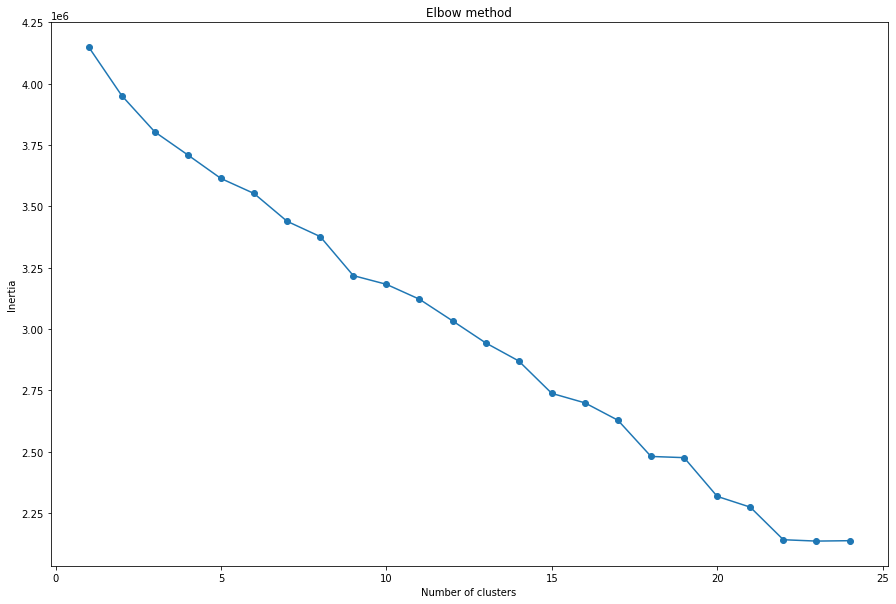

In [61]:
inertias = []

for i in range(1,25):
    PCA_KMean = Pipeline([
        ('pca', PCA(random_state=0)),
        ('kmeans', KMeans(n_clusters=i, random_state=0))
    ])
    PCA_KMean.fit(X_reduced_df)
    inertias.append(PCA_KMean.named_steps['kmeans'].inertia_)

plt.figure(figsize=(15, 10))
plt.plot(range(1,25), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As we can infere from the plot, we can put number 9, 13, 20, or 22 for the number of k in our data. Now let's  visualize k = 22 

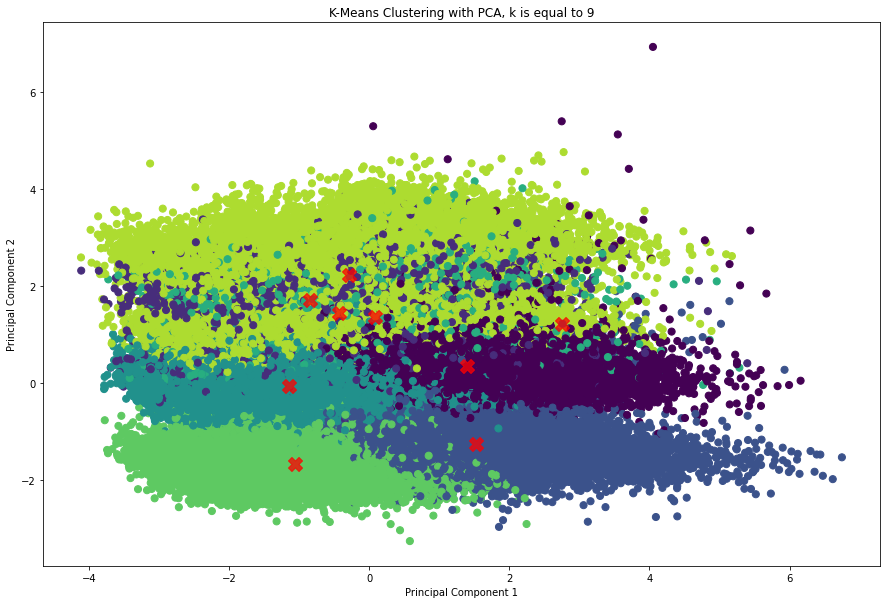

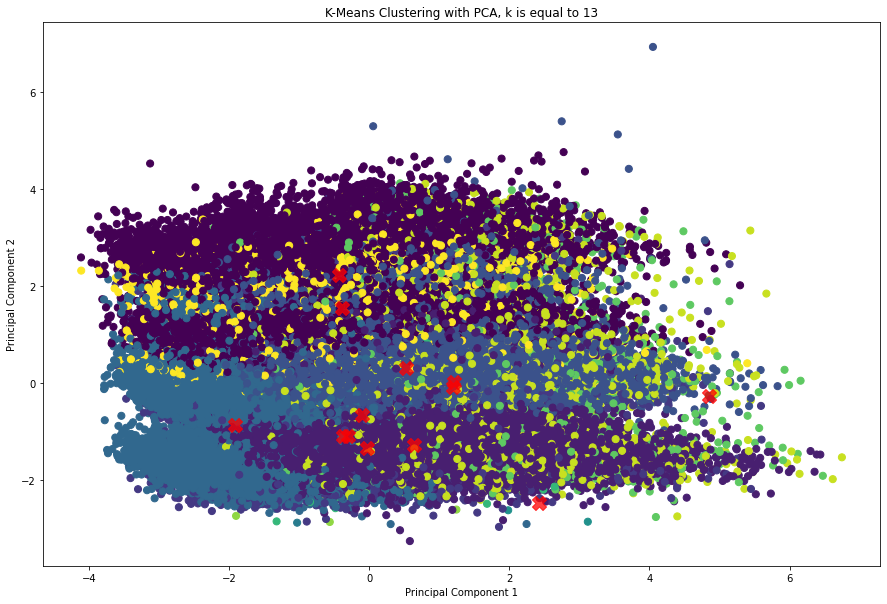

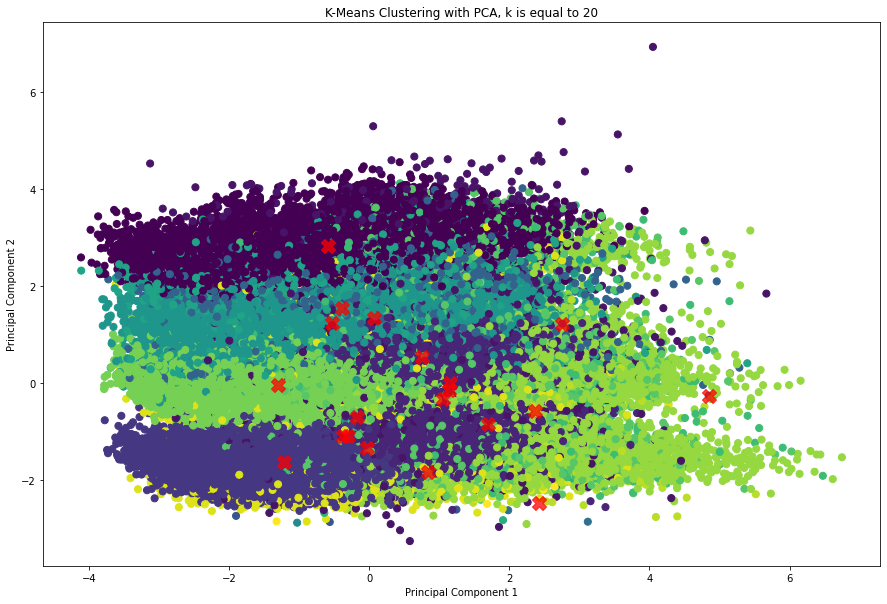

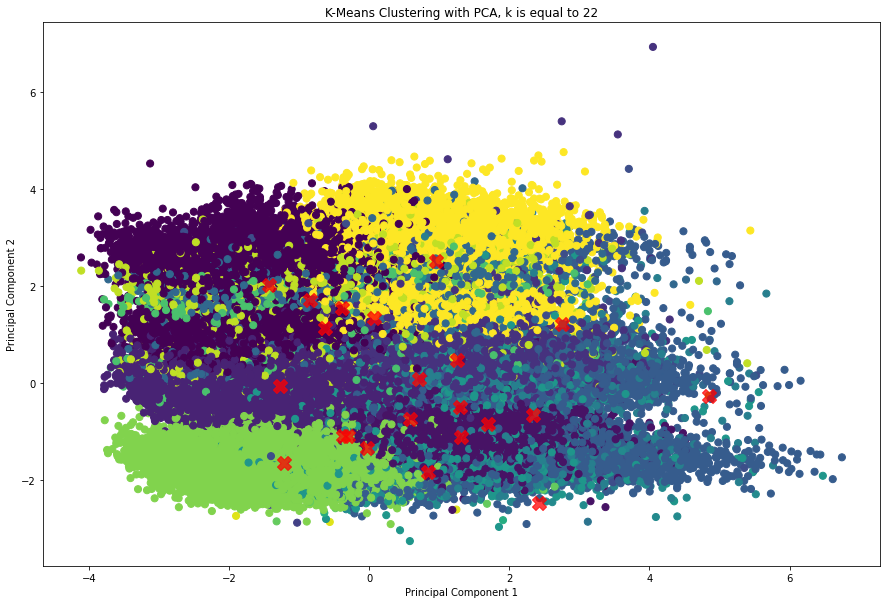

In [65]:
k_samples = [9,13,20,22]

for k in k_samples:

    PCA_KMean = Pipeline([
            ('pca', PCA(random_state=0)),
            ('kmeans', KMeans(n_clusters=k, random_state=0))
        ])

    PCA_KMean.fit(X)

    labels = PCA_KMean.predict(X)

    # Extract the PCA component from the pipeline
    pca = PCA_KMean.named_steps['pca']

    # Get the transformed data (principal components)
    X_pca = pca.transform(X)

    # Extract the KMeans component from the pipeline
    kmeans = PCA_KMean.named_steps['kmeans']

    # Get the cluster centers in the PCA-transformed space
    centers_pca = kmeans.cluster_centers_

    # Create a scatter plot of the PCA-transformed data points colored by their cluster label
    plt.figure(figsize=(15, 10))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')

    # Plot the cluster centers in the PCA-transformed space
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')

    # Add title and labels to the plot
    plt.title(f'K-Means Clustering with PCA, k is equal to {k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # Show the plot
    plt.show()